# Darian Kacanski

## 12/3/2025

## Data cleaning

## importing statements

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# importing dataset

In [3]:
datafile = "Lottery_Powerball- Copy.csv"
df = pd.read_csv(datafile) 

## looking at dataset

In [4]:
df

,Draw Date,Winning Numbers,Multiplier
0,9/26/2020,11 21 27 36 62 24,3.0
1,9/30/2020,14 18 36 49 67 18,2.0
2,10/3/2020,18 31 36 43 47 20,2.0
3,10/7/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0
...,...,...,...
1861,11/12/2025,29 39 43 51 65 23,2.0
1862,11/15/2025,06 07 12 47 53 21,4.0
1863,11/17/2025,07 33 50 57 66 23,5.0
1864,11/19/2025,10 31 49 51 68 19,2.0


## Summary of Data

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1866 entries, 0 to 1865
Data columns (total 3 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Draw Date        1866 non-null   object 
 1   Winning Numbers  1866 non-null   object 
 2   Multiplier       1656 non-null   float64
dtypes: float64(1), object(2)
memory usage: 43.9+ KB


## First 15 columns printed below 

In [6]:
df.head(15)

,Draw Date,Winning Numbers,Multiplier
0,9/26/2020,11 21 27 36 62 24,3.0
1,9/30/2020,14 18 36 49 67 18,2.0
2,10/3/2020,18 31 36 43 47 20,2.0
3,10/7/2020,06 24 30 53 56 19,2.0
4,10/10/2020,05 18 23 40 50 18,3.0
5,10/14/2020,21 37 52 53 58 05,2.0
6,10/17/2020,06 10 31 37 44 23,2.0
7,10/21/2020,01 03 13 44 56 26,3.0
8,10/24/2020,18 20 27 45 65 06,2.0
9,10/28/2020,11 28 37 40 53 13,2.0


## gives last 5 columns

In [7]:
df.tail()

,Draw Date,Winning Numbers,Multiplier
1861,11/12/2025,29 39 43 51 65 23,2.0
1862,11/15/2025,06 07 12 47 53 21,4.0
1863,11/17/2025,07 33 50 57 66 23,5.0
1864,11/19/2025,10 31 49 51 68 19,2.0
1865,11/22/2025,28 32 36 51 69 02,2.0


## Shows a rows

In [8]:
df.sample()

,Draw Date,Winning Numbers,Multiplier
351,12/13/2017,02 24 28 51 58 07,3.0


## Shows rows and columns

In [9]:
df.shape

(1866, 3)

## prints columns

In [10]:
df.columns

Index(['Draw Date', 'Winning Numbers', 'Multiplier'], dtype='object')

## counts the amount of values

In [11]:
df.count()

Draw Date          1866
Winning Numbers    1866
Multiplier         1656
dtype: int64

## gives the basic statisitcs from my data

In [12]:
df.describe()

,Multiplier
count,1656.000000
mean,2.779589
std,1.169230
min,2.000000
25%,2.000000
50%,2.000000
75%,3.000000
max,10.000000


## shows specific column

In [13]:
df.Multiplier

0       3.0
1       2.0
2       2.0
3       2.0
4       3.0
       ... 
1861    2.0
1862    4.0
1863    5.0
1864    2.0
1865    2.0
Name: Multiplier, Length: 1866, dtype: float64

## shows the Datatype

In [14]:
df.dtypes

Draw Date           object
Winning Numbers     object
Multiplier         float64
dtype: object

## renaming columns so easier to work with

In [15]:
# renaming columns
df.rename(columns={
    "Draw Date" : "date",
    "Winning Numbers" : "winning_numbers",
    "Multiplier" : "multiplier",
}, inplace=True)

## seeing if there are any duplicate rows

In [16]:
# making sure no duplicate rows
df.duplicated().sum()

0

## Splitting the winning numbers into mutiple columns so analysis is easier

### I decided to keeping winning numbers column because it makes it easier to answer my second question about number combinations

In [17]:
# split the winning numbers column into new columns
df[['num1', 'num2', 'num3', 'num4', 'num5', 'powerball']] = df['winning_numbers'].str.split(' ', expand=True)

# convert them to numeric
df[['num1', 'num2', 'num3', 'num4', 'num5', 'powerball']] = df[['num1', 'num2', 'num3', 'num4', 'num5', 'powerball']].apply(pd.to_numeric)


## making NAN rows for the blank records

In [18]:
invalid_rows = df[pd.to_numeric(df['multiplier']).isna()]

## making sure it worked 

In [19]:
invalid_rows

,date,winning_numbers,multiplier,num1,num2,num3,num4,num5,powerball
756,1/18/2014,13 14 19 31 38 25,NaN,13,14,19,31,38,25
757,1/15/2014,07 08 09 24 29 25,NaN,7,8,9,24,29,25
758,1/11/2014,10 15 33 48 54 34,NaN,10,15,33,48,54,34
759,1/8/2014,10 28 39 47 58 22,NaN,10,28,39,47,58,22
760,1/4/2014,19 20 37 41 58 14,NaN,19,20,37,41,58,14
...,...,...,...,...,...,...,...,...,...
961,2/1/2012,08 13 17 34 59 35,NaN,8,13,17,34,59,35
962,1/28/2012,05 33 41 54 59 13,NaN,5,33,41,54,59,13
963,1/25/2012,04 19 28 29 47 05,NaN,4,19,28,29,47,5
964,1/21/2012,12 24 43 44 45 07,NaN,12,24,43,44,45,7


## making the multiplier column into an integer

In [20]:
df['multiplier'] = df['multiplier'].astype('Int64') 

## making the date just be a year since my questions don't need the month and day

In [21]:
# convert draw date column to datetime format
df['date'] = pd.to_datetime(df['date'])

# create a new Year column
df['Year'] = df['date'].dt.year

# drop date column
df = df.drop(columns=['date'])

# I decided to get rid of winning_numbers because I used concat

In [23]:
df=df.drop(columns=['winning_numbers'])

# making sure all my cleaning worked

In [24]:
df

,multiplier,num1,num2,num3,num4,num5,powerball,Year
0,3,11,21,27,36,62,24,2020
1,2,14,18,36,49,67,18,2020
2,2,18,31,36,43,47,20,2020
3,2,6,24,30,53,56,19,2020
4,3,5,18,23,40,50,18,2020
...,...,...,...,...,...,...,...,...
1861,2,29,39,43,51,65,23,2025
1862,4,6,7,12,47,53,21,2025
1863,5,7,33,50,57,66,23,2025
1864,2,10,31,49,51,68,19,2025


# Which powerball numbers show up most often? 

# there were to many numbers to show and looked to cluttered so I kept it to top 10

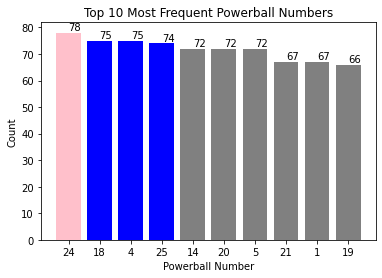

In [23]:
# Get top 10 most frequent Powerball numbers, sorted from most to least frequent
counts = df['powerball'].value_counts().head(10).sort_values(ascending=False)

colors = ['pink'] + ['blue']*3 + ['gray']*6

# Plot bars without gaps
plt.bar(range(len(counts)), counts.values, color=colors)
plt.title('Top 10 Most Frequent Powerball Numbers')
plt.xlabel('Powerball Number')
plt.ylabel('Count')

# Label each bar with the Powerball number
plt.xticks(range(len(counts)), counts.index)

# Show count value on top of each bar
for i, val in enumerate(counts.values):
    plt.text(i, val + 1, str(val))
    
plt.show()


# The bar chart above shows that 24 is the msot drawn but everything is super evenly spread which means it still random

# Are there duplicate winning number combinations, and how many times do the duplicate combinations come up?

# answered it above but wanted to show again

In [24]:
df.duplicated().sum()

0

# What is the most common multiplier for powerball?

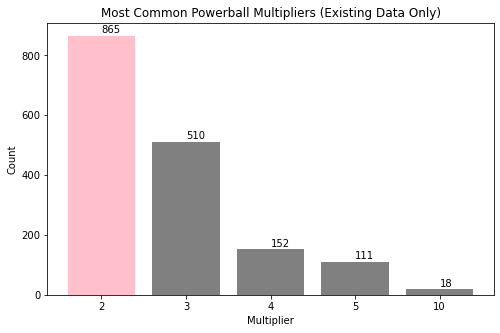

In [25]:

# Remove multipliers 6 and 8 if they exist
mult_counts = df['multiplier'].dropna().value_counts().sort_index()
mult_counts = mult_counts[~mult_counts.index.isin([6, 8])] 

# Define colors: highlight 2 in pink, others gray
colors = ['pink' if x == 2 else 'gray' for x in mult_counts.index]

# Plot by index positions (not numeric multipliers) so there’s no big gap
plt.figure(figsize=(8,5))
plt.bar(range(len(mult_counts)), mult_counts.values, color=colors)
plt.title('Most Common Powerball Multipliers (Existing Data Only)')
plt.xlabel('Multiplier')
plt.ylabel('Count')

# Add value labels on top of each bar
for i, val in enumerate(mult_counts.values):
    plt.text(i, val + 10, str(val))

# Label x-axis manually with the actual multipliers (no missing gaps)
plt.xticks(range(len(mult_counts)), mult_counts.index)
plt.show()



# The most common multiplier is 2 which isn't suprising. I was hoping for more intersting results

# Has the number of times winning numbers show up changed over the years?

# I wasn't sure how to graph this question because the answer I wanted wasn't easy to graph

# So I had AI help make a heatmap for each of the years

# excluded powerball because comes from a different pool than the other balls. It only has 26 and not 69.

### The void gap in the heatmap is because from 2010 to 2015 they only had number up to 59 not 69

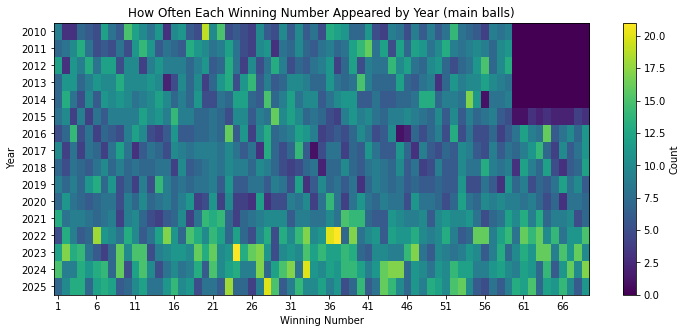

In [29]:
# LONG format of the 5 main balls (exclude the red powerball)
main_cols = ['num1','num2','num3','num4','num5']
long = df.melt(id_vars=['Year'], value_vars=main_cols,
               var_name='pos', value_name='num')

# counts of each number per year → matrix (rows=year, cols=number)
mat = long.groupby(['Year','num']).size().unstack(fill_value=0).sort_index()
mat.columns = mat.columns.astype(int)

# Heatmap
plt.figure(figsize=(12,5))
plt.imshow(mat.values, aspect='auto', cmap='viridis', interpolation='nearest')
plt.colorbar(label='Count')
plt.yticks(range(len(mat.index)), mat.index)
plt.xticks(range(0, mat.shape[1], 5), mat.columns[::5])
plt.title('How Often Each Winning Number Appeared by Year (main balls)')
plt.xlabel('Winning Number')
plt.ylabel(' Year')
plt.show()



# The distribution is even the no big repitions or patterns showing up. 

# What are the percentages of numbers showing up from each different number range? (1-10, 11-20, etc . .)

# I decided to go with cancat because it easier than changing the string into a integer

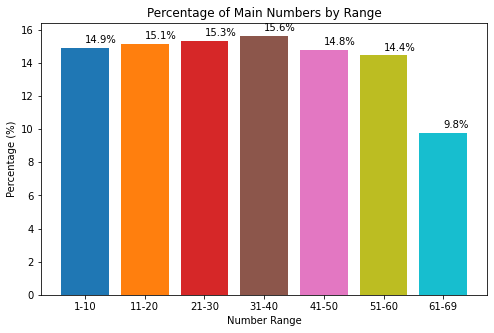

In [79]:
# Combine the 5 main-number columns into one Series
all_nums = pd.concat([df['num1'], df['num2'], df['num3'], df['num4'], df['num5']], ignore_index=True)
all_nums = pd.to_numeric(all_nums, errors='coerce').dropna().astype(int)

# Set maximum for Powerball white balls
max_main = 69

# Define bins and labels for 1–69
edges = list(range(1, max_main + 1, 10)) + [max_main + 1]
labels = [f'{low}-{high-1}' for low, high in zip(edges[:-1], edges[1:])]

# Cut numbers into ranges and calculate percentages
cats = pd.cut(all_nums, bins=edges, labels=labels, include_lowest=True, right=False)
range_pct = cats.value_counts(sort=False, normalize=True) * 100

# Use different colors for each bar
colors = plt.cm.tab10(np.linspace(0, 1, len(range_pct)))

# Plot
plt.figure(figsize=(8,5))
bars = plt.bar(range_pct.index.astype(str), range_pct.values, color=colors)
plt.title('Percentage of Main Numbers by Range')
plt.xlabel('Number Range')
plt.ylabel('Percentage (%)')

# Add percentage labels above each bar
for bar, val in zip(bars, range_pct.values):
    plt.text(bar.get_x() + bar.get_width()/2, bar.get_height() + 0.3,
             f'{val:.1f}%')
plt.show()




# The numbers a pretty even excpet for 60s because they got added to powerball after 2015